In [1]:
# Import necessary Libraries
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning)

import numpy as np
np.seterr(divide='ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
hcv_ds = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\HCV_input_2023.xlsx")

In [3]:
hcv_ds.head()

,Date,HCV Sales,FoodAGRO,Food products,Consumer goods,"Cosmetics, toiletries, soaps & detergents",Electronics,Wholesale & retail trading (mil),Wholesale trading (mil),Retail trading(mil),...,Growth YoY%,GVA Gross Value Add,GVA Agriculture,GVA Mining,GVA_Manu,Electricity,GVA_Cons,Trade,GVA Real Estate,Social and personal services
0,2011-07-01,29539.0,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
1,2011-08-01,29559.0,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
2,2011-09-01,33803.0,21727.866667,17298.166667,20562.266667,4007.833333,1229.1,274024,197985,20086,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
3,2011-10-01,28685.0,21345.366667,17771.033333,19766.666667,3958.400000,1454.9,300989,215812,20882,...,6.18,6.912985e+06,1.669885e+06,216162.633333,1.112248e+06,155409.833333,630319.266667,1.163190e+06,1.134477e+06,809198.900000
4,2011-11-01,28518.0,21345.366667,17771.033333,19766.666667,3958.400000,1454.9,300989,215812,20882,...,6.18,6.912985e+06,1.669885e+06,216162.633333,1.112248e+06,155409.833333,630319.266667,1.163190e+06,1.134477e+06,809198.900000


In [4]:
hcv_ds.set_index("Date",inplace=True)

In [5]:
hcv_ds.describe()

,HCV Sales,FoodAGRO,Food products,Consumer goods,"Cosmetics, toiletries, soaps & detergents",Electronics,Wholesale & retail trading (mil),Wholesale trading (mil),Retail trading(mil),M1,...,Growth YoY%,GVA Gross Value Add,GVA Agriculture,GVA Mining,GVA_Manu,Electricity,GVA_Cons,Trade,GVA Real Estate,Social and personal services
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,27123.188406,15168.214493,10590.372464,41653.126329,5717.000725,1703.158696,333768.152174,185978.543478,48646.956522,30552.672717,...,5.271932,1.066645e+07,1.793934e+06,287429.436232,1.789898e+06,262009.567391,9.794454e+05,1.910599e+06,2.313842e+06,1.441750e+06
std,9093.572824,5720.088241,5092.507315,44642.256531,1540.503980,1609.053488,117278.579581,75784.339575,21810.630156,11697.053552,...,5.820988,3.787851e+06,8.164108e+05,88925.298114,5.296924e+05,126797.873233,2.888863e+05,6.394495e+05,9.149918e+05,6.370370e+05
min,1405.950000,7929.000000,3930.766667,12277.300000,3958.400000,325.366667,183131.000000,89455.000000,20086.000000,15817.000000,...,-29.290000,6.377357e+06,8.969137e+05,185394.133333,1.110348e+06,154886.833333,5.835635e+05,1.114280e+06,1.134477e+06,8.091989e+05
25%,20738.750000,10438.333333,6449.100000,18252.466667,4530.600000,558.666667,269094.000000,147332.000000,27706.000000,20984.500000,...,5.223333,7.923846e+06,1.225861e+06,227553.691667,1.329344e+06,173488.266667,7.722997e+05,1.423721e+06,1.649609e+06,9.729866e+05
50%,27149.500000,13473.983333,9386.966667,20068.783333,5221.700000,890.583333,295648.000000,166365.500000,44431.500000,26860.500000,...,6.245000,9.562608e+06,1.525140e+06,265119.133333,1.706816e+06,215828.433333,9.066856e+05,1.816075e+06,2.021243e+06,1.216325e+06
75%,32903.250000,19247.133333,13547.233333,24336.233333,6812.500000,2513.077778,342077.000000,194972.000000,66021.000000,38533.600875,...,7.590000,1.106073e+07,1.962265e+06,318831.566667,2.005124e+06,263879.716667,1.158005e+06,2.119079e+06,2.710084e+06,1.600357e+06
max,52517.000000,29899.800000,24821.366667,153065.866667,9298.000000,6231.000000,749454.000000,497911.000000,92687.000000,55271.000000,...,10.786667,1.998879e+07,4.313515e+06,580850.500000,3.110668e+06,625937.600000,1.891312e+06,3.810171e+06,4.836027e+06,3.010941e+06


In [6]:
hcv_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2011-07-01 to 2022-12-01
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   HCV Sales                                  138 non-null    float64
 1   FoodAGRO                                   138 non-null    float64
 2   Food products                              138 non-null    float64
 3   Consumer goods                             138 non-null    float64
 4   Cosmetics, toiletries, soaps & detergents  138 non-null    float64
 5   Electronics                                138 non-null    float64
 6   Wholesale & retail trading (mil)           138 non-null    int64  
 7   Wholesale trading (mil)                    138 non-null    int64  
 8   Retail trading(mil)                        138 non-null    int64  
 9   M1                                         138 non-null    float64
 10  M3     

In [7]:
hcv_ds.shape

(138, 39)

In [8]:
hcv_ds.columns

Index(['HCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading (mil)', 'Wholesale trading (mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'Infra Index', 'Evnt_Pos ',
       'Evnt_Negative', 'COSPI', 'GDP', 'Growth YoY%', 'GVA Gross Value Add',
       'GVA Agriculture', 'GVA Mining', 'GVA_Manu', 'Electricity', 'GVA_Cons',
       'Trade', 'GVA Real Estate', 'Social  and personal  services '],
      dtype='object')

In [9]:
hcv_ds.isnull().sum()

HCV Sales                                     0
FoodAGRO                                      0
Food products                                 0
Consumer goods                                0
Cosmetics, toiletries, soaps & detergents     0
Electronics                                   0
Wholesale & retail trading (mil)              0
Wholesale trading (mil)                       0
Retail trading(mil)                           0
M1                                            0
M3                                            0
BEI                                           0
IIP                                           0
PMI                                           0
CC                                            0
WPI                                           0
CMR                                           0
Vloans                                        0
E-comm                                        0
Retail Sales                                  0
Credit_CS                               

In [10]:
hcv = hcv_ds.drop(['Infra Index'],axis=1)

In [11]:
hcv.columns

Index(['HCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading (mil)', 'Wholesale trading (mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'GDP', 'Growth YoY%', 'GVA Gross Value Add', 'GVA Agriculture',
       'GVA Mining', 'GVA_Manu', 'Electricity', 'GVA_Cons', 'Trade',
       'GVA Real Estate', 'Social  and personal  services '],
      dtype='object')

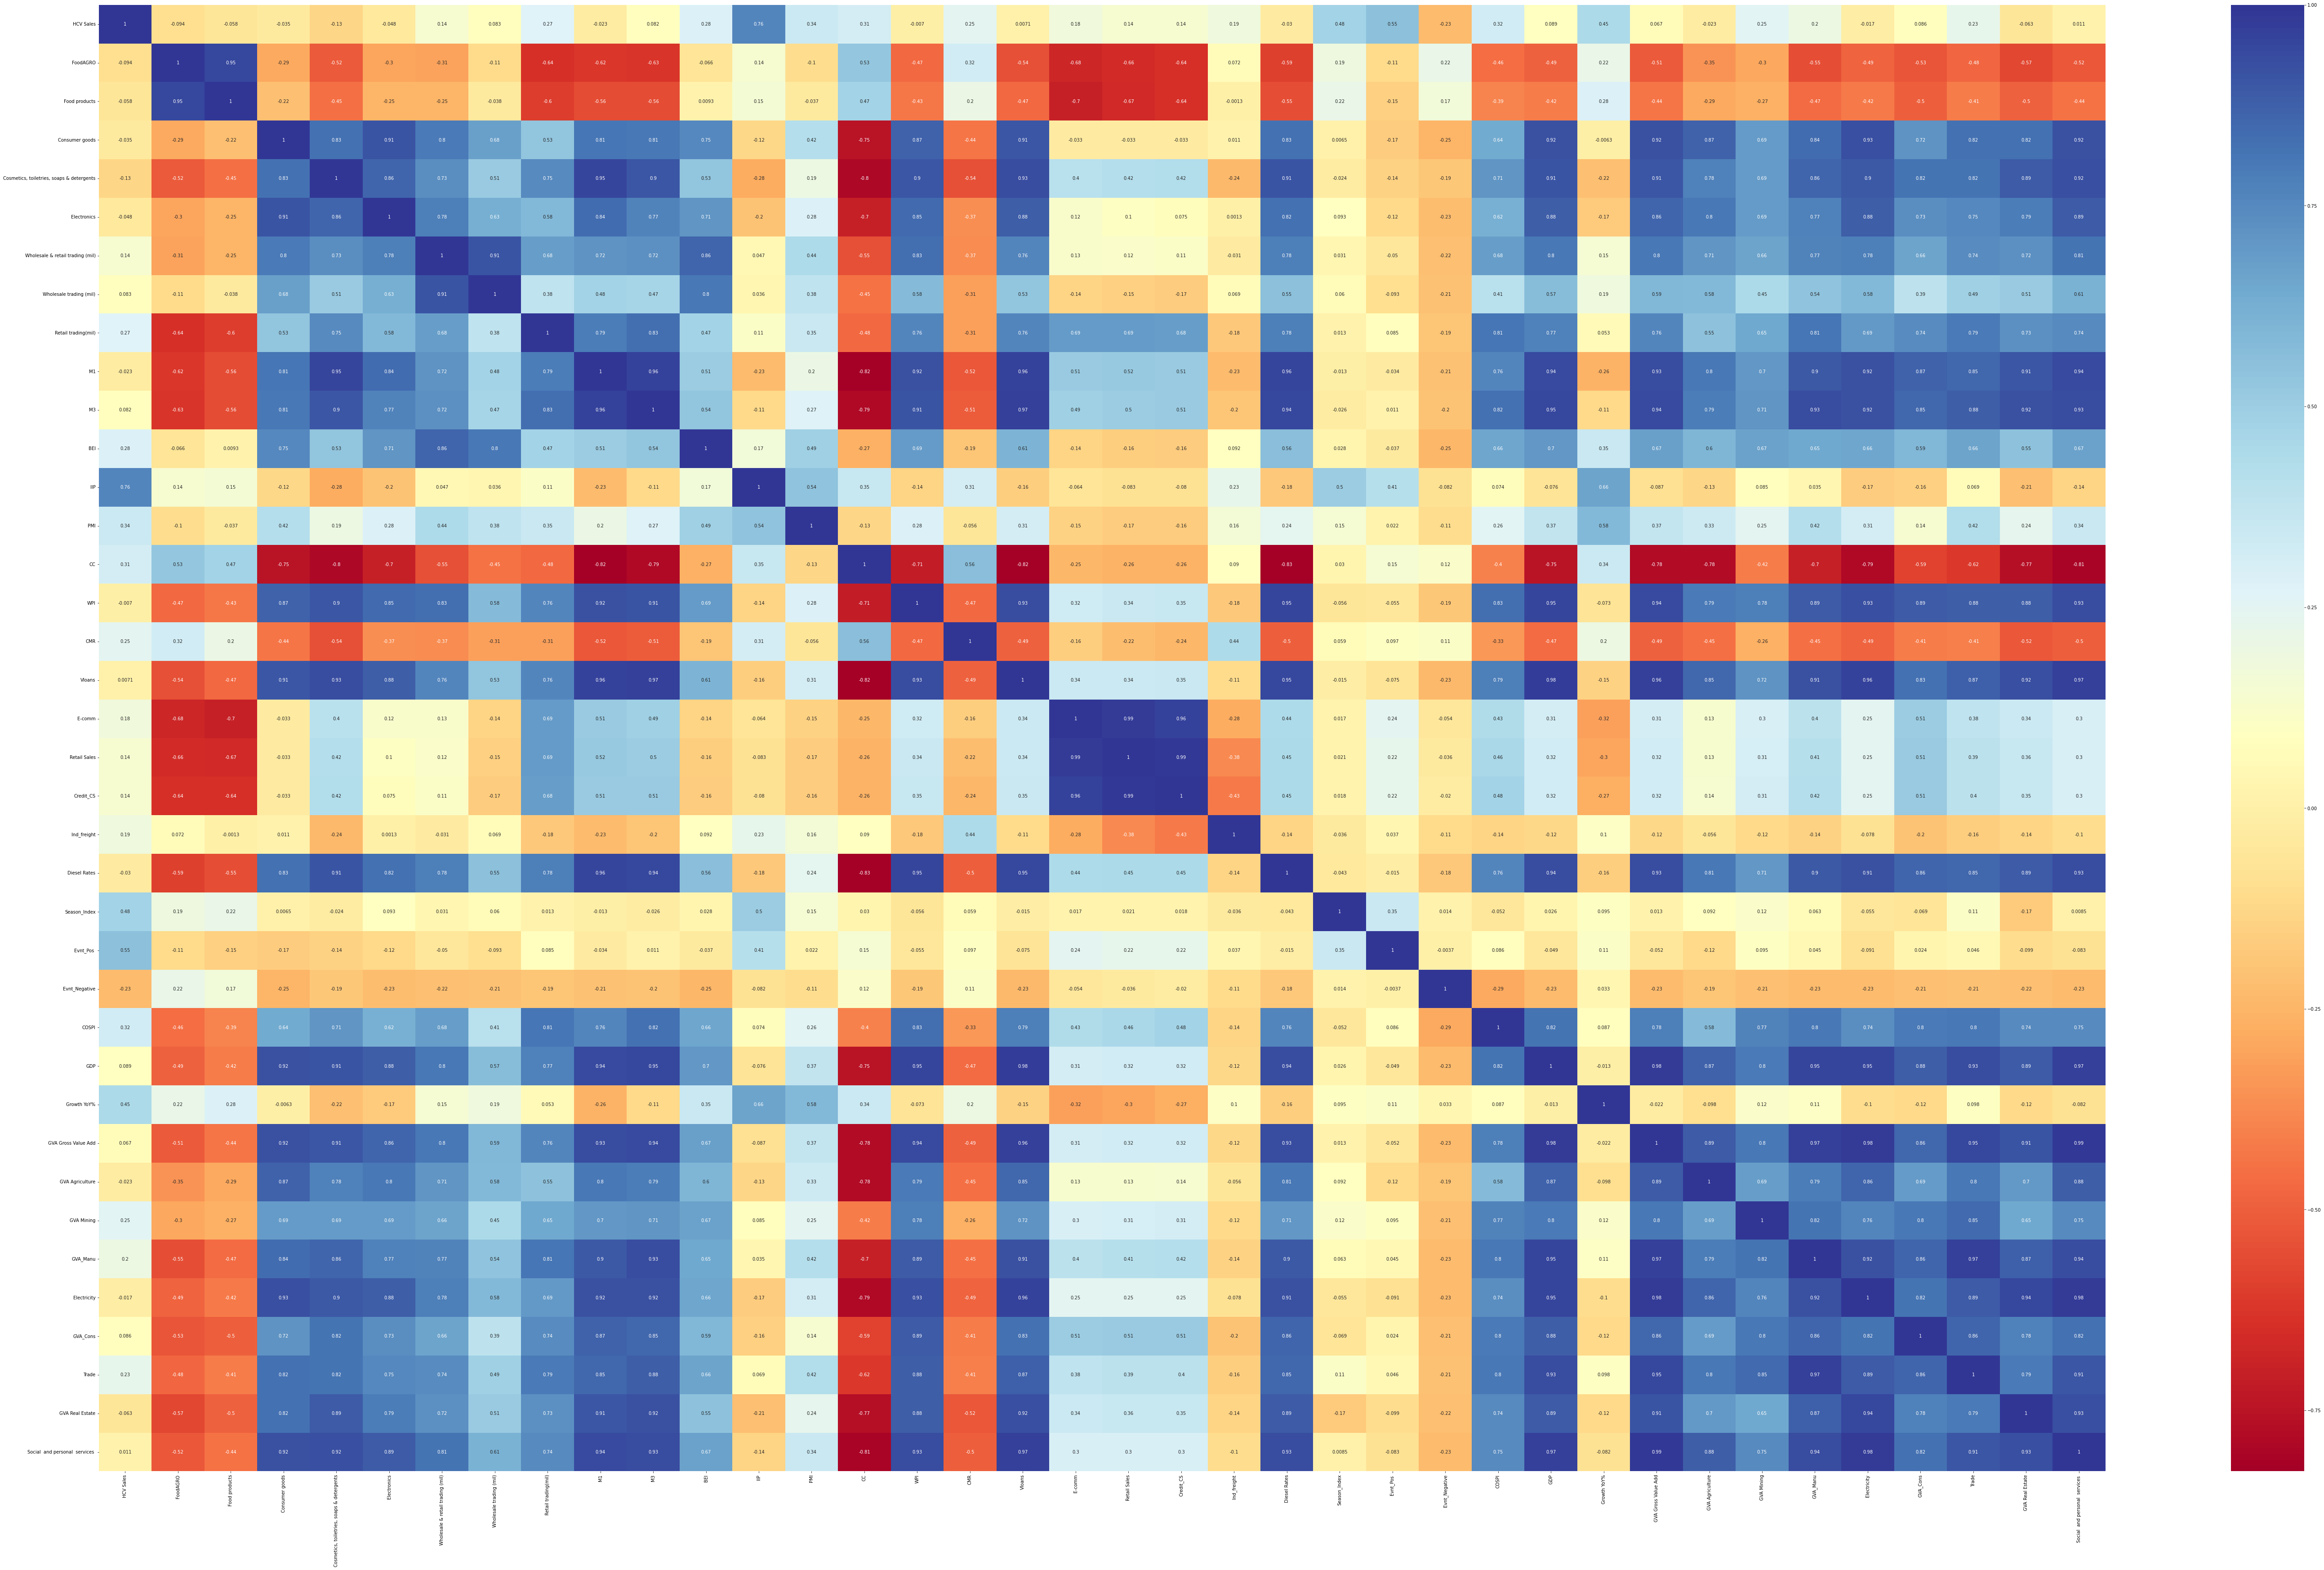

In [12]:
hcv_corr = hcv.corr()
x,y = plt.subplots(figsize=(100,60))
sns.heatmap(hcv_corr,cmap='RdYlBu',yticklabels=hcv_corr.columns,annot=True)
plt.show()

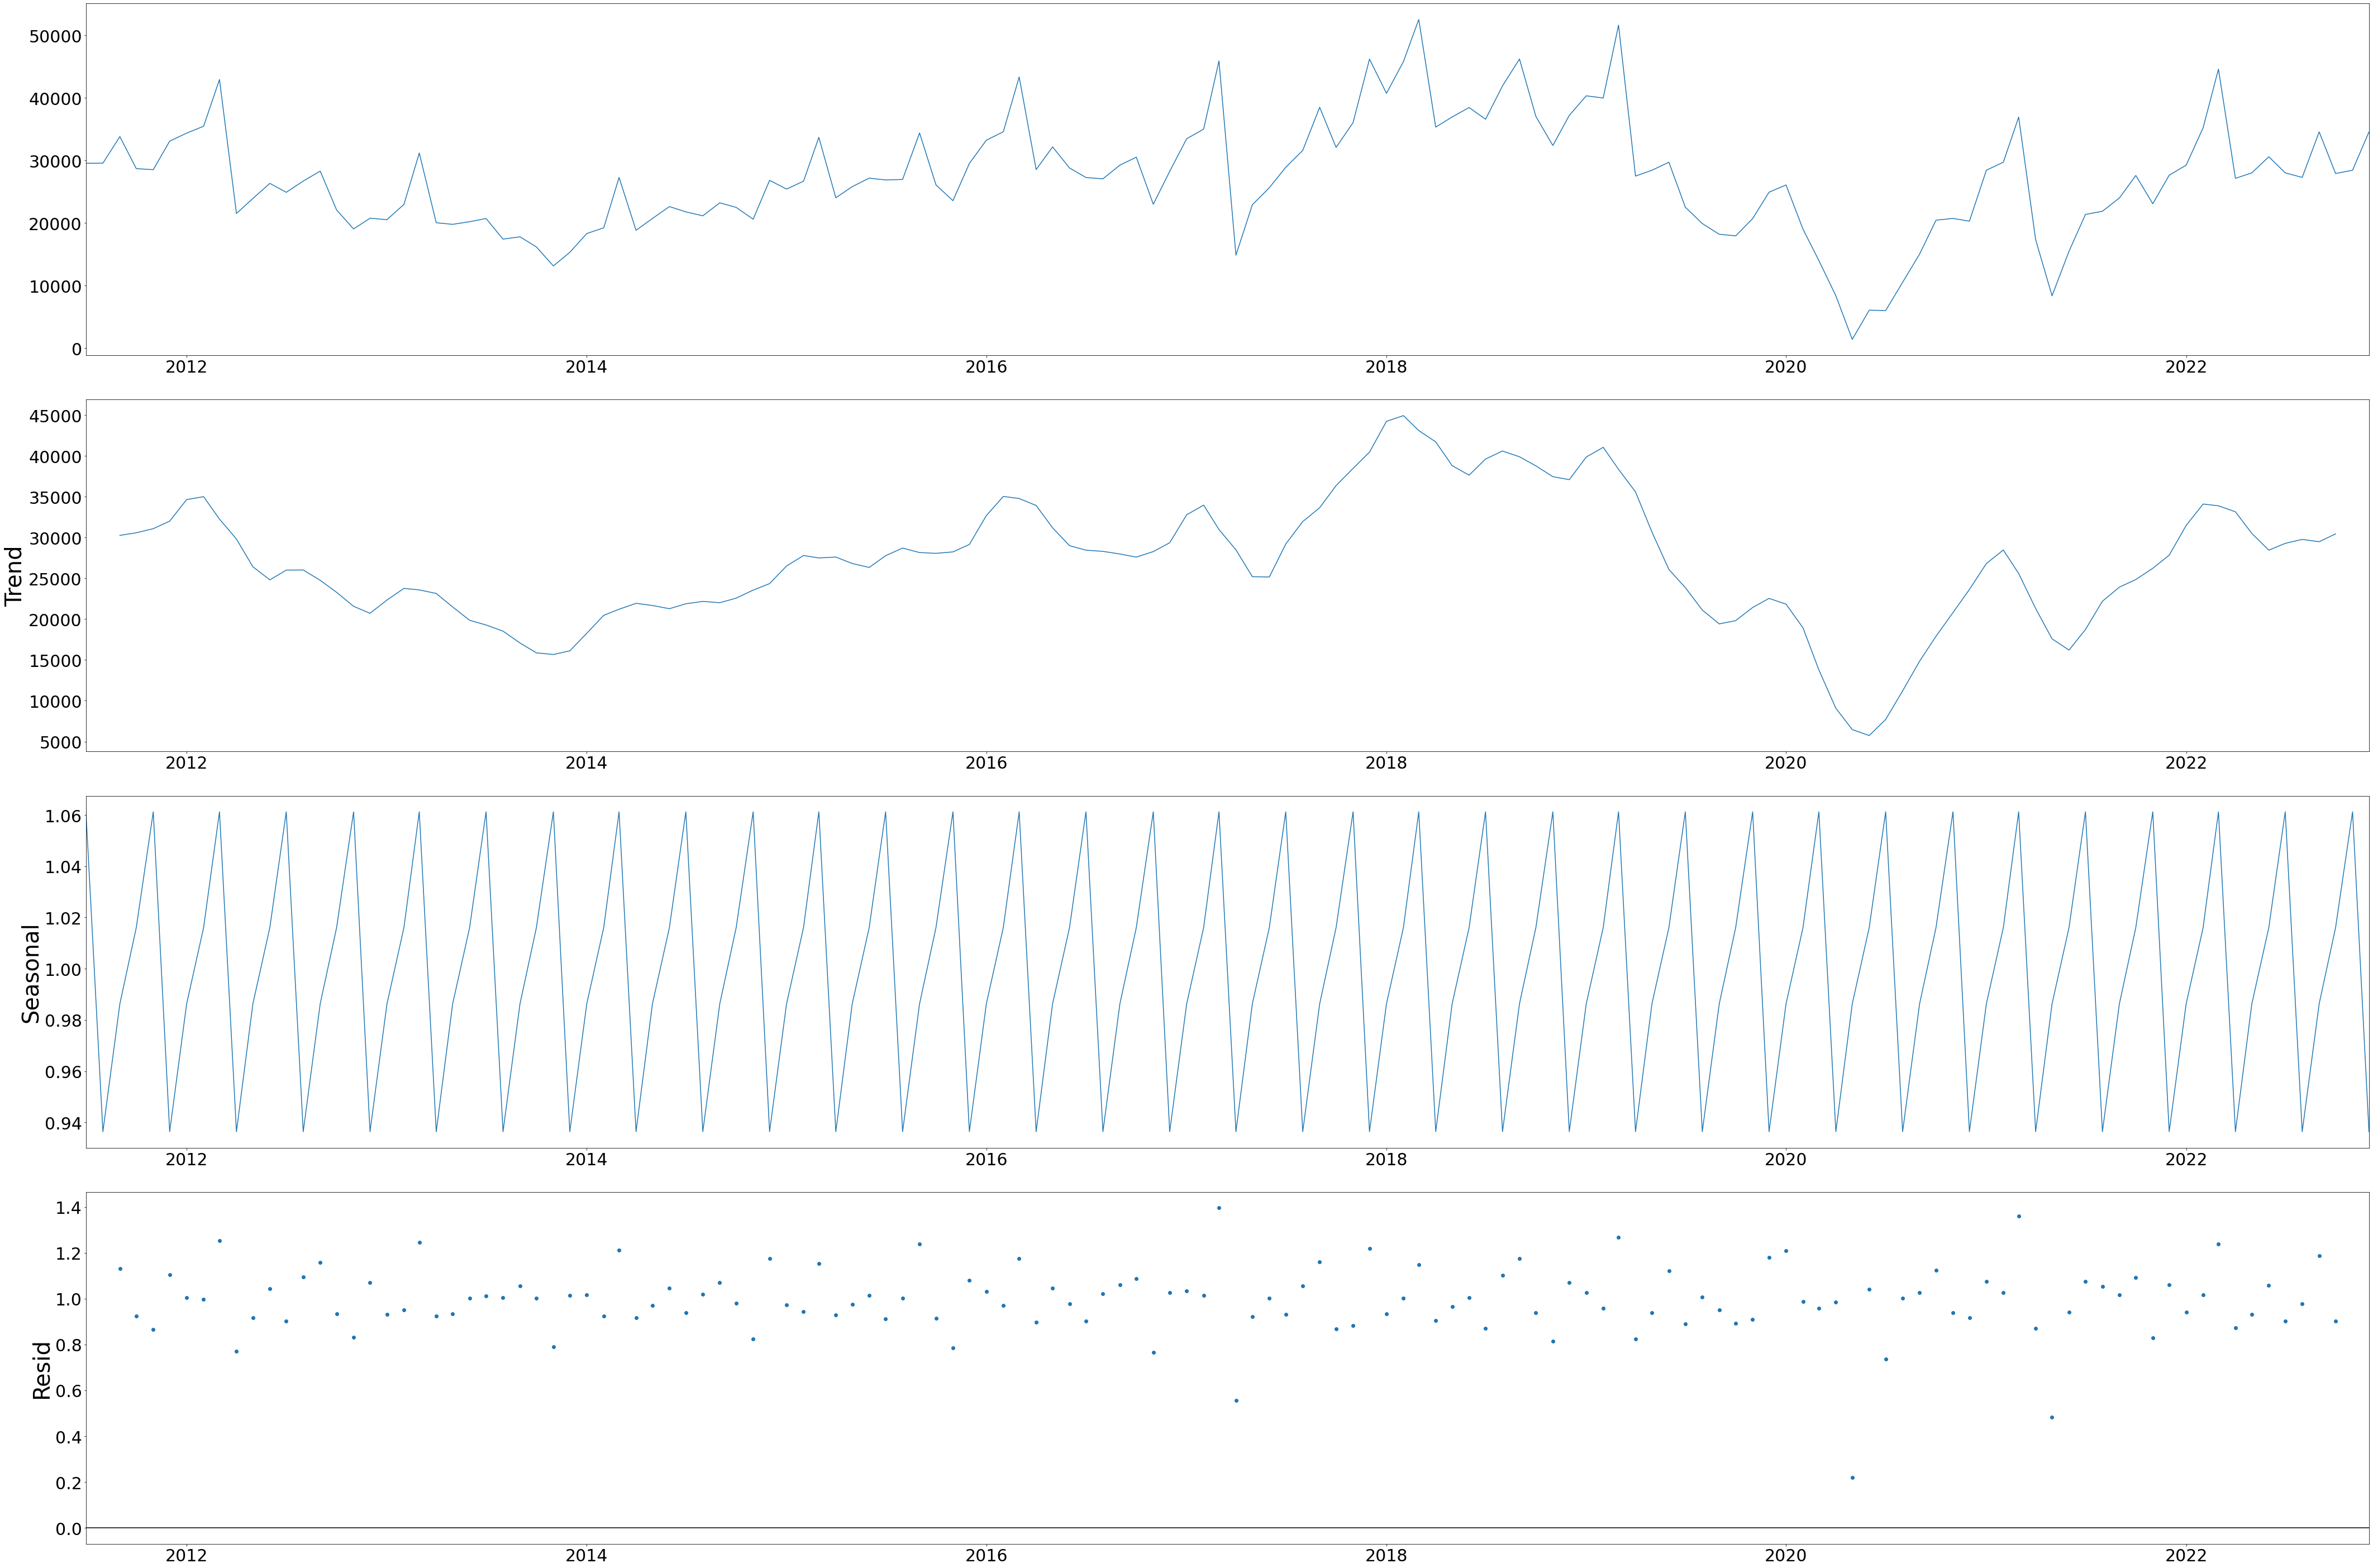

In [13]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
HCV_Sales = hcv[['HCV Sales']]
result = seasonal_decompose(HCV_Sales, model='multiplicative',period=4)
fig_size = plt.rcParams["figure.figsize"]
#plt.rcParams.update({'font.size': 22}
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.rc('font', size=40)
fig_size[0] = 60
fig_size[1] = 40
result.plot(seasonal=True)
pyplot.show()

In [14]:
import dtale
dtale.show(hcv)

In [15]:
import sweetviz as sv

hcv_report = sv.analyze(hcv)
hcv_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
import pandas as pd
from pandas_profiling import ProfileReport

2023-05-12 12:56:38,704 - INFO     - Pandas backend loaded 1.5.2
2023-05-12 12:56:38,713 - INFO     - Numpy backend loaded 1.21.5
2023-05-12 12:56:38,720 - INFO     - Pyspark backend loaded 3.3.1
2023-05-12 12:56:38,721 - INFO     - Python backend loaded


In [17]:
#HCV
HCV_report = ProfileReport(hcv)
HCV_report.to_file(output_file ='HCV_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Train and Test Split

In [18]:
# HCV
hcv.columns

Index(['HCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading (mil)', 'Wholesale trading (mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'GDP', 'Growth YoY%', 'GVA Gross Value Add', 'GVA Agriculture',
       'GVA Mining', 'GVA_Manu', 'Electricity', 'GVA_Cons', 'Trade',
       'GVA Real Estate', 'Social  and personal  services '],
      dtype='object')

In [19]:
hcv.isnull().sum()

HCV Sales                                    0
FoodAGRO                                     0
Food products                                0
Consumer goods                               0
Cosmetics, toiletries, soaps & detergents    0
Electronics                                  0
Wholesale & retail trading (mil)             0
Wholesale trading (mil)                      0
Retail trading(mil)                          0
M1                                           0
M3                                           0
BEI                                          0
IIP                                          0
PMI                                          0
CC                                           0
WPI                                          0
CMR                                          0
Vloans                                       0
E-comm                                       0
Retail Sales                                 0
Credit_CS                                    0
Ind_freight  

In [20]:
#Train and Test
X = hcv.drop('HCV Sales',axis = 1)
y = hcv[['HCV Sales']]

In [21]:
X.columns

Index(['FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading (mil)', 'Wholesale trading (mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'GDP', 'Growth YoY%', 'GVA Gross Value Add', 'GVA Agriculture',
       'GVA Mining', 'GVA_Manu', 'Electricity', 'GVA_Cons', 'Trade',
       'GVA Real Estate', 'Social  and personal  services '],
      dtype='object')

In [22]:
y.columns

Index(['HCV Sales'], dtype='object')

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
## This line instantiates the model. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,shuffle=False)

In [24]:
rf = RandomForestRegressor(n_estimators=20) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_train, y_train)

0.9609720439236414

In [25]:
rf.score(X_test, y_test)

0.45037290309180333

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

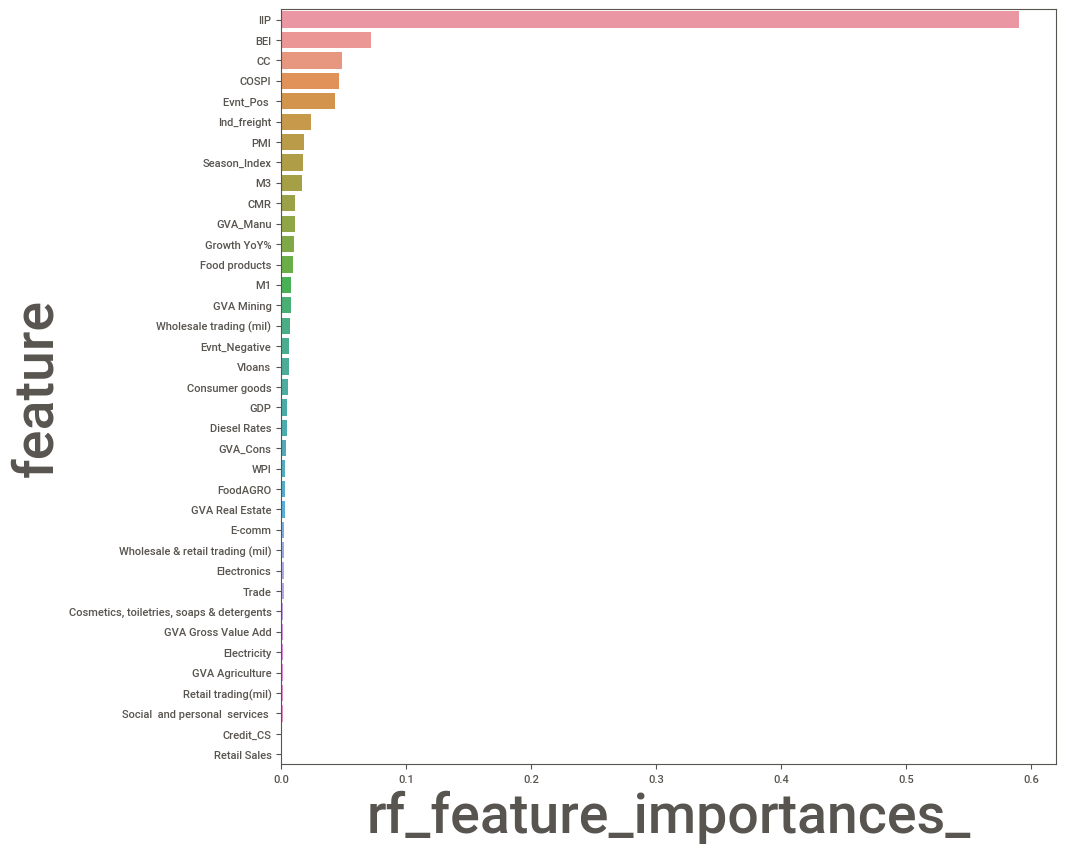

In [26]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':rf.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
#features_df.to_csv("HCV_RF2.csv")
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [27]:
param_test = {'max_depth':[3,5,7,8,9,10], 'min_samples_split':[2,3,4,5,6],
                'n_estimators':[100,200,400,600,800,1000], 'max_features': ['sqrt' , 'auto']}
gsearch = GridSearchCV(estimator = RandomForestRegressor(random_state=10),param_grid = param_test, scoring='r2',n_jobs=-1,cv=5)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 400, 600, 800, 1000]},
             scoring='r2')

In [28]:
mod1=RandomForestRegressor(min_samples_split =gsearch.best_params_['min_samples_split'],\
                          n_estimators = gsearch.best_params_['n_estimators'], max_depth = gsearch.best_params_['max_depth']\
                          ,max_features=gsearch.best_params_['max_features'] ,n_jobs = -1,random_state=10)\
                        .fit(X_train,y_train)

RandomForestRegressor()

RandomForestRegressor()

In [29]:
features_df.to_csv(r'C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files/Indicators/features_hcv.csv')

In [30]:
hcv.columns

Index(['HCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading (mil)', 'Wholesale trading (mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'GDP', 'Growth YoY%', 'GVA Gross Value Add', 'GVA Agriculture',
       'GVA Mining', 'GVA_Manu', 'Electricity', 'GVA_Cons', 'Trade',
       'GVA Real Estate', 'Social  and personal  services '],
      dtype='object')

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

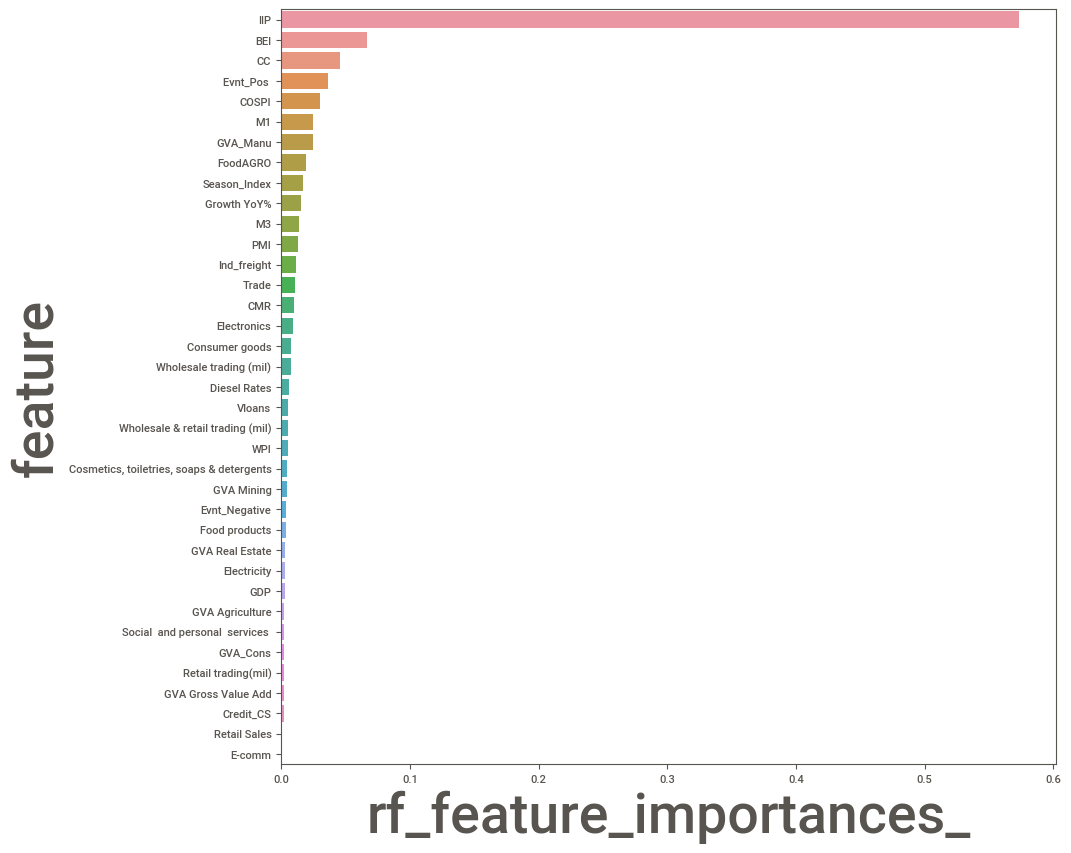

In [31]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':mod1.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [32]:
var1 = ['HCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading (mil)', 'Wholesale trading (mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'GDP', 'Growth YoY%', 'GVA Gross Value Add', 'GVA Agriculture',
       'GVA Mining', 'GVA_Manu', 'Electricity', 'GVA_Cons', 'Trade',
       'GVA Real Estate', 'Social  and personal  services ']

In [35]:
var = ['HCV Sales', 
       'BEI','IIP','CC','Retail Sales','Ind_freight',
       'Season_Index', 'Evnt_Pos ', 'Evnt_Negative', 'COSPI',
       'Growth YoY%']

In [170]:
#hcv['BEI_log'] = np.log(hcv['BEI'])

In [171]:
#hcv['GVA_Manu_sqrt'] = np.sqrt(hcv['GVA_Manu'])

In [172]:
#hcv['IIP_inv'] = 1/hcv['IIP']

In [36]:
Hcv_before = hcv[var1]

In [37]:
Hcv_after = hcv[var]

In [38]:
# define two data frames one before the drop and one after the drop



# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(Hcv_before)
X2 = sm.tools.add_constant(Hcv_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after =  pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

#display the series
print('DATA BEFORE')
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_before)
    
#print("DATA AFTER")
#print('-'*100)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                        16078.779640
HCV Sales                                       11.696047
FoodAGRO                                        32.164499
Food products                                   31.395683
Consumer goods                                 229.626494
Cosmetics, toiletries, soaps & detergents       28.147797
Electronics                                     49.499646
Wholesale & retail trading (mil)               514.029488
Wholesale trading (mil)                        250.208502
Retail trading(mil)                             52.934617
M1                                             171.597365
M3                                             124.438681
BEI                                             41.256434
IIP                                              9.628935
PMI                                              5.053852
CC                                              38.027814
WPI                                            228.435916
CMR           

In [39]:
print("DATA AFTER")
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_after)

DATA AFTER
----------------------------------------------------------------------------------------------------


const            1539.062179
HCV Sales           4.949492
BEI                 3.712195
IIP                 4.680114
CC                  2.089331
Retail Sales        3.036439
Ind_freight         1.533423
Season_Index        2.113151
Evnt_Pos            1.619415
Evnt_Negative       1.242347
COSPI               4.720809
Growth YoY%         3.023049
dtype: float64

In [40]:
X3 = Hcv_after.drop('HCV Sales', axis = 1)
Y3 = Hcv_after[['HCV Sales']]

In [41]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.20, random_state=1,shuffle=False)

In [42]:
X4 = sm.add_constant(X3)

# OLS model
ln_model = sm.OLS(Y3, X4)
hcv_model = ln_model.fit()

In [43]:
print(hcv_model.summary())

                            OLS Regression Results                            
Dep. Variable:              HCV Sales   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     50.16
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.56e-39
Time:                        13:07:42   Log-Likelihood:                -1342.9
No. Observations:                 138   AIC:                             2708.
Df Residuals:                     127   BIC:                             2740.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.733e+04   1.29e+04     -5.237

In [70]:
hcv_for = pd.read_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\HCV_Forecast_2023_2024.csv")

In [71]:
hcv_for = hcv_for.set_index('Date')

In [72]:
hcv_for.columns

Index(['Const', 'BEI_upper', 'IIP_fitted', 'CC_fitted', 'Retail Sales_fitted',
       'Ind_freight_fitted', 'Season_Index', 'Event_Pos', 'Event_Negative',
       'COSPI_upper', 'Growth YoY%_fitted'],
      dtype='object')

In [73]:
hcv_for.head()

,Const,BEI_upper,IIP_fitted,CC_fitted,Retail Sales_fitted,Ind_freight_fitted,Season_Index,Event_Pos,Event_Negative,COSPI_upper,Growth YoY%_fitted
Date,,,,,,,,,,,
Jan-23,1,134.645362,102.534841,81.294649,925.486089,99.683189,0.998766,0,0,24597281.46,2.960681
Feb-23,1,135.133839,99.150965,82.735615,930.551737,98.841046,1.000127,0,0,24799564.31,3.389966
Mar-23,1,135.424563,96.021586,84.502567,935.478279,97.690755,1.202582,0,0,24755623.85,3.865939
Apr-23,1,134.484643,50.806218,85.083774,940.269535,99.163995,0.796020,0,0,26508373.47,-8.448742
May-23,1,134.732375,60.057481,74.306273,944.929220,98.370359,0.870706,0,0,26746208.93,-8.215754


In [74]:
X4

,BEI,IIP,CC,Retail Sales,Ind_freight,Season_Index,Evnt_Pos,Evnt_Negative,COSPI,Growth YoY%
Date,,,,,,,,,,
2011-07-01,121.5,100.31,115.00,474.000000,109.317315,0.908852,0,0,2646905.3,6.680000
2011-08-01,121.5,100.31,115.00,474.000000,109.059972,0.932444,0,0,2518331.2,6.680000
2011-09-01,121.5,100.31,115.00,474.000000,108.807408,1.060659,0,0,2481991.1,6.680000
2011-10-01,118.8,100.31,116.20,474.000000,108.555673,0.956830,0,0,2728697.7,6.180000
2011-11-01,118.8,100.31,116.20,474.000000,108.296462,0.896021,0,0,2508661.5,6.180000
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,137.5,95.00,74.21,920.277407,99.893089,0.920202,0,0,18014419.1,8.893333
2022-09-01,137.5,103.90,80.09,920.277407,99.893089,1.031219,0,0,18014419.1,5.403333
2022-10-01,134.4,87.20,85.07,920.277407,99.893089,0.953836,0,0,23390488.1,5.403333


In [75]:
frv = ['Const', 'BEI_upper', 'IIP_fitted', 'CC_fitted', 'Retail Sales_fitted',
       'Ind_freight_fitted', 'Season_Index', 'Event_Pos', 'Event_Negative',
       'COSPI_upper', 'Growth YoY%_fitted']

In [76]:
ft_hcv = hcv_for[frv]

In [77]:
hcv_for.shape

(24, 11)

In [78]:
ft_hcv.shape

(24, 11)

In [79]:
ft_hcv

,Const,BEI_upper,IIP_fitted,CC_fitted,Retail Sales_fitted,Ind_freight_fitted,Season_Index,Event_Pos,Event_Negative,COSPI_upper,Growth YoY%_fitted
Date,,,,,,,,,,,
Jan-23,1,134.645362,102.534841,81.294649,925.486089,99.683189,0.998766,0,0,24597281.46,2.960681
Feb-23,1,135.133839,99.150965,82.735615,930.551737,98.841046,1.000127,0,0,24799564.31,3.389966
Mar-23,1,135.424563,96.021586,84.502567,935.478279,97.690755,1.202582,0,0,24755623.85,3.865939
Apr-23,1,134.484643,50.806218,85.083774,940.269535,99.163995,0.796020,0,0,26508373.47,-8.448742
May-23,1,134.732375,60.057481,74.306273,944.929220,98.370359,0.870706,0,0,26746208.93,-8.215754
Jun-23,1,134.899090,80.604045,74.585328,949.460947,102.804800,0.944056,0,0,26984517.16,-7.011553
Jul-23,1,136.425619,84.862005,67.223486,764.190154,101.023794,0.938752,0,0,27408404.87,1.105565
Aug-23,1,136.647579,85.999401,68.914282,768.476410,100.918154,0.953332,0,0,27597945.01,1.232260
Sep-23,1,136.683953,95.316504,71.421651,772.644963,100.822384,1.060360,0,0,27730558.82,2.861118


In [80]:
hcv_f1 = hcv_model.predict(ft_hcv)

In [81]:
hcv_f1

Date
Jan-23    36582.229575
Feb-23    36044.082372
Mar-23    37661.995515
Apr-23    23147.768842
May-23    24612.708542
Jun-23    31419.932424
Jul-23    30761.065326
Aug-23    31540.738394
Sep-23    35379.503611
Oct-23    42725.049331
Nov-23    35051.869165
Dec-23    36975.222320
Jan-24    38285.297948
Feb-24    38247.667662
Mar-24    43214.256911
Apr-24    29361.157673
May-24    28464.193976
Jun-24    33846.649574
Jul-24    37358.608891
Aug-24    37494.472513
Sep-24    40694.521249
Oct-24    41537.494154
Nov-24    39788.689984
Dec-24    41284.819363
dtype: float64

Executing shutdown due to inactivity...


2023-05-12 14:52:23,566 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2023-05-12 14:52:35,836 - INFO     - Executing shutdown...


<AxesSubplot: >

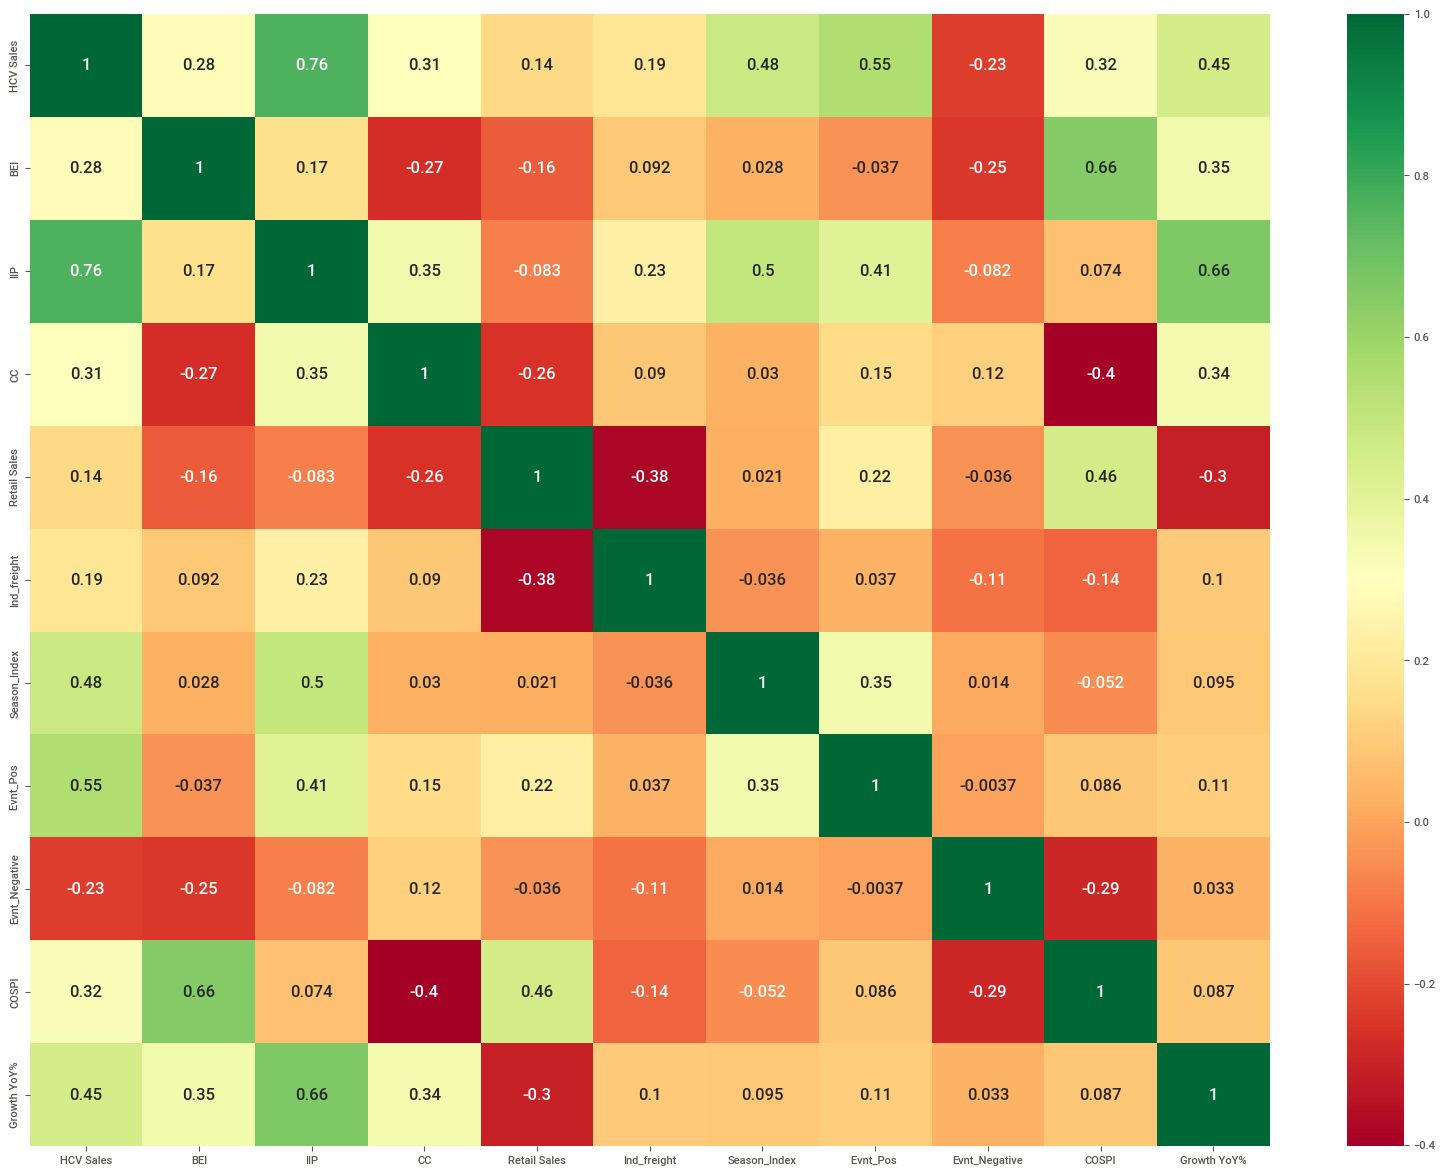

In [47]:
# calculate the correlation matrix
hcv1 = Hcv_after.corr()
#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
# display the correlation matrix
#display(corr)
f, ax = plt.subplots(figsize=(20, 15))
# plot the correlation heatmap
sns.heatmap(hcv1, xticklabels=hcv1.columns, yticklabels=hcv1.columns, cmap='RdYlGn',annot= True,annot_kws={'fontsize':12})

<AxesSubplot: xlabel='CC', ylabel='HCV Sales'>

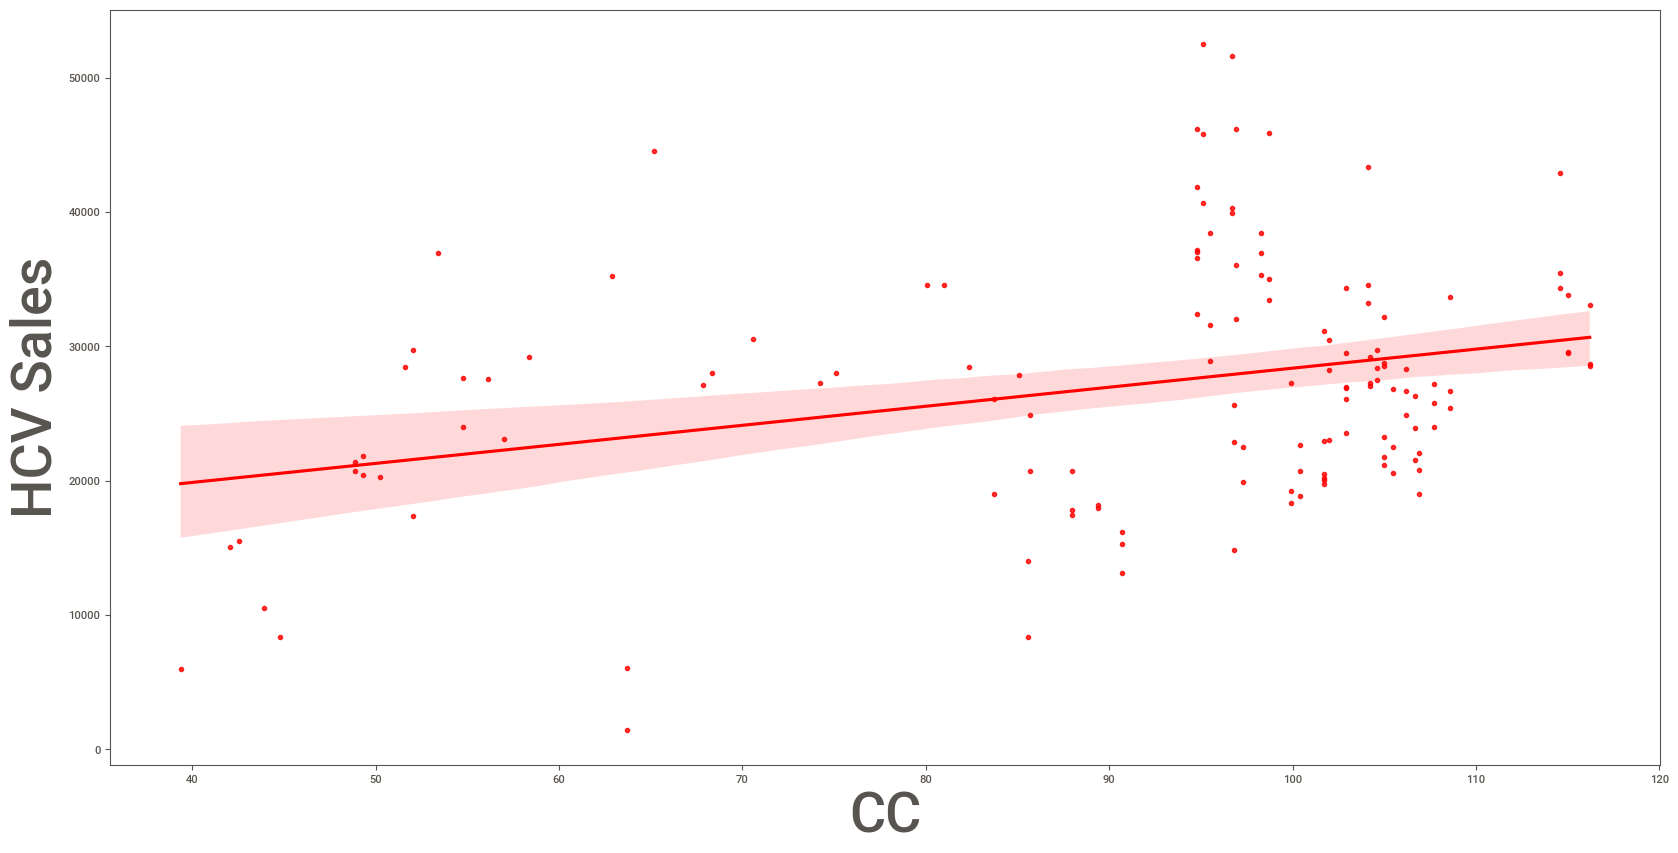

In [48]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="CC", y = "HCV Sales", data = Hcv_after, color= 'red')

<AxesSubplot: xlabel='Ind_freight', ylabel='HCV Sales'>

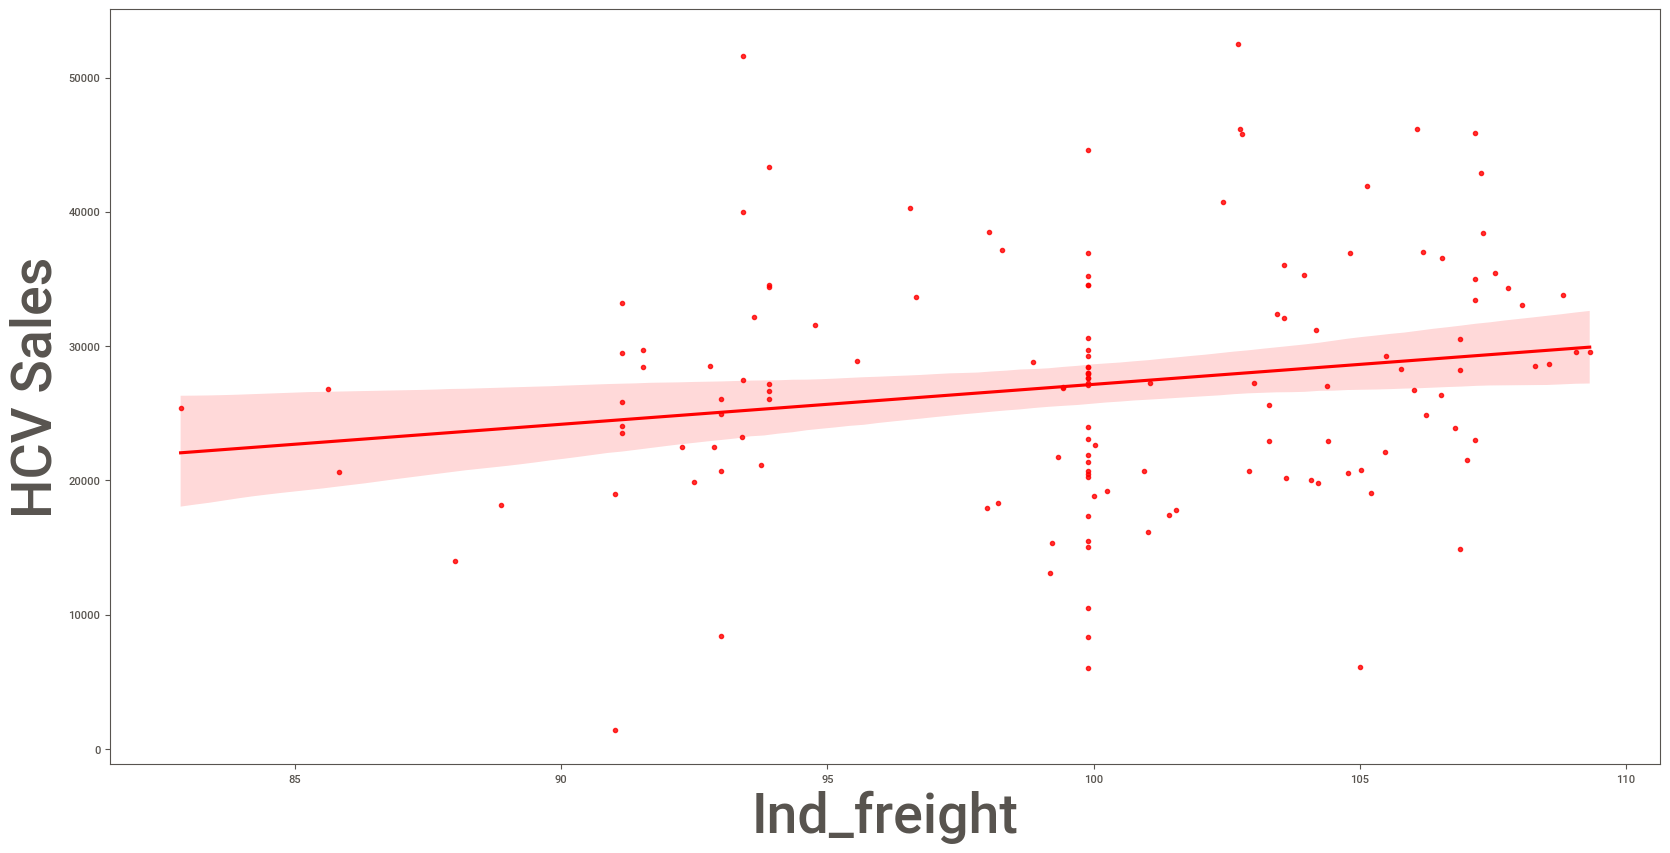

In [49]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="Ind_freight", y = "HCV Sales", data = Hcv_after, color= 'red')

<AxesSubplot: xlabel='Retail Sales', ylabel='HCV Sales'>

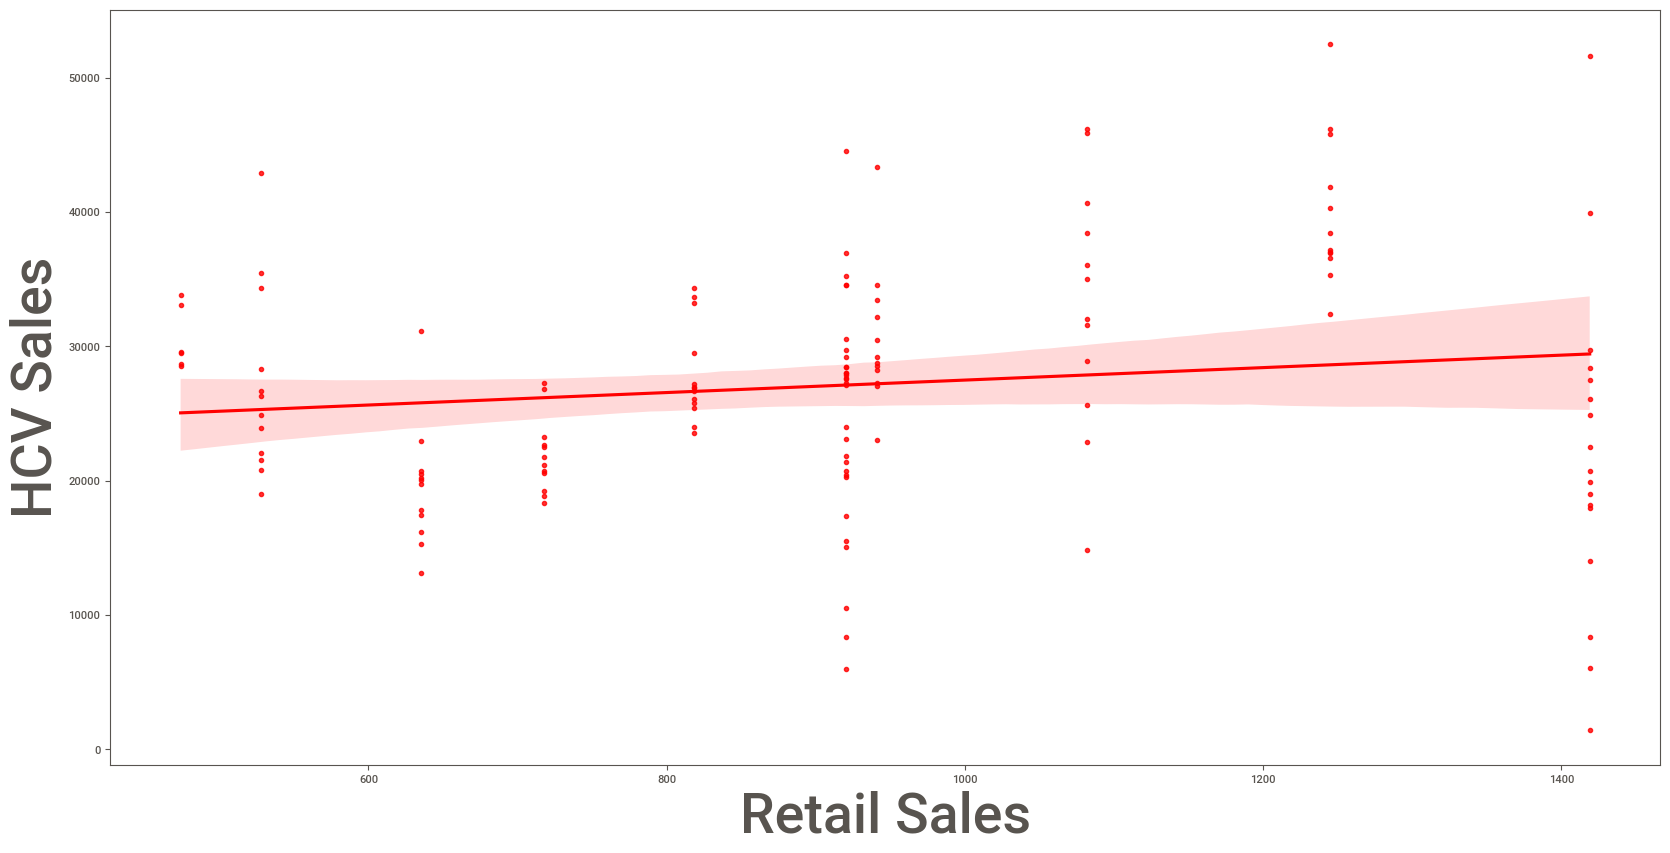

In [50]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="Retail Sales", y = "HCV Sales", data = Hcv_after, color= 'red')

<AxesSubplot: xlabel='COSPI', ylabel='HCV Sales'>

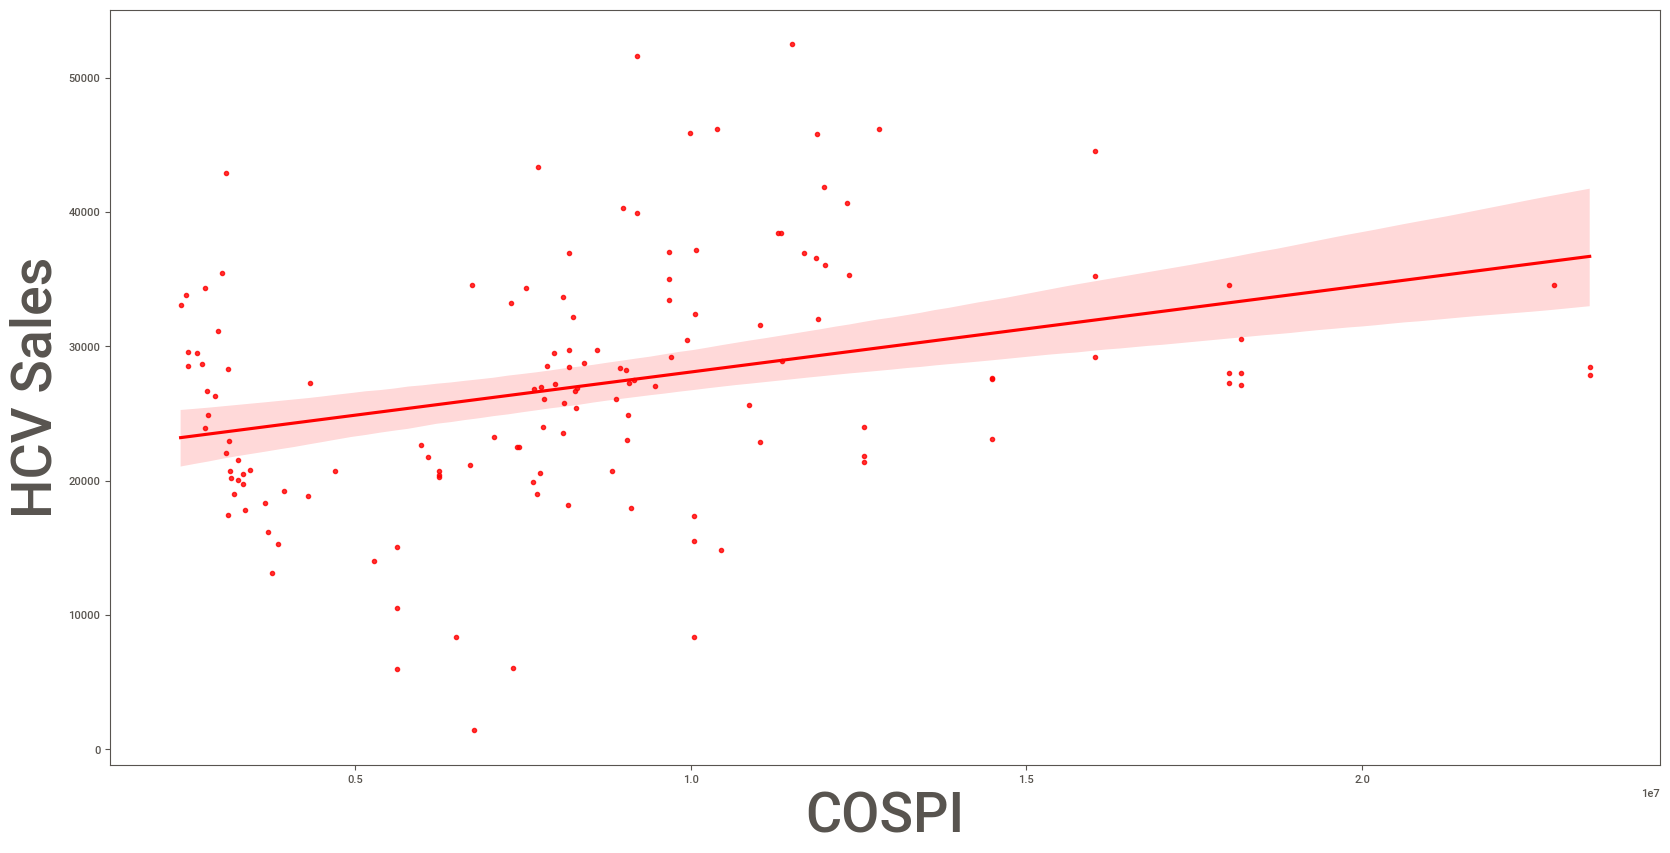

In [51]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="COSPI", y = "HCV Sales", data = Hcv_after, color= 'red')

<AxesSubplot: xlabel='BEI', ylabel='HCV Sales'>

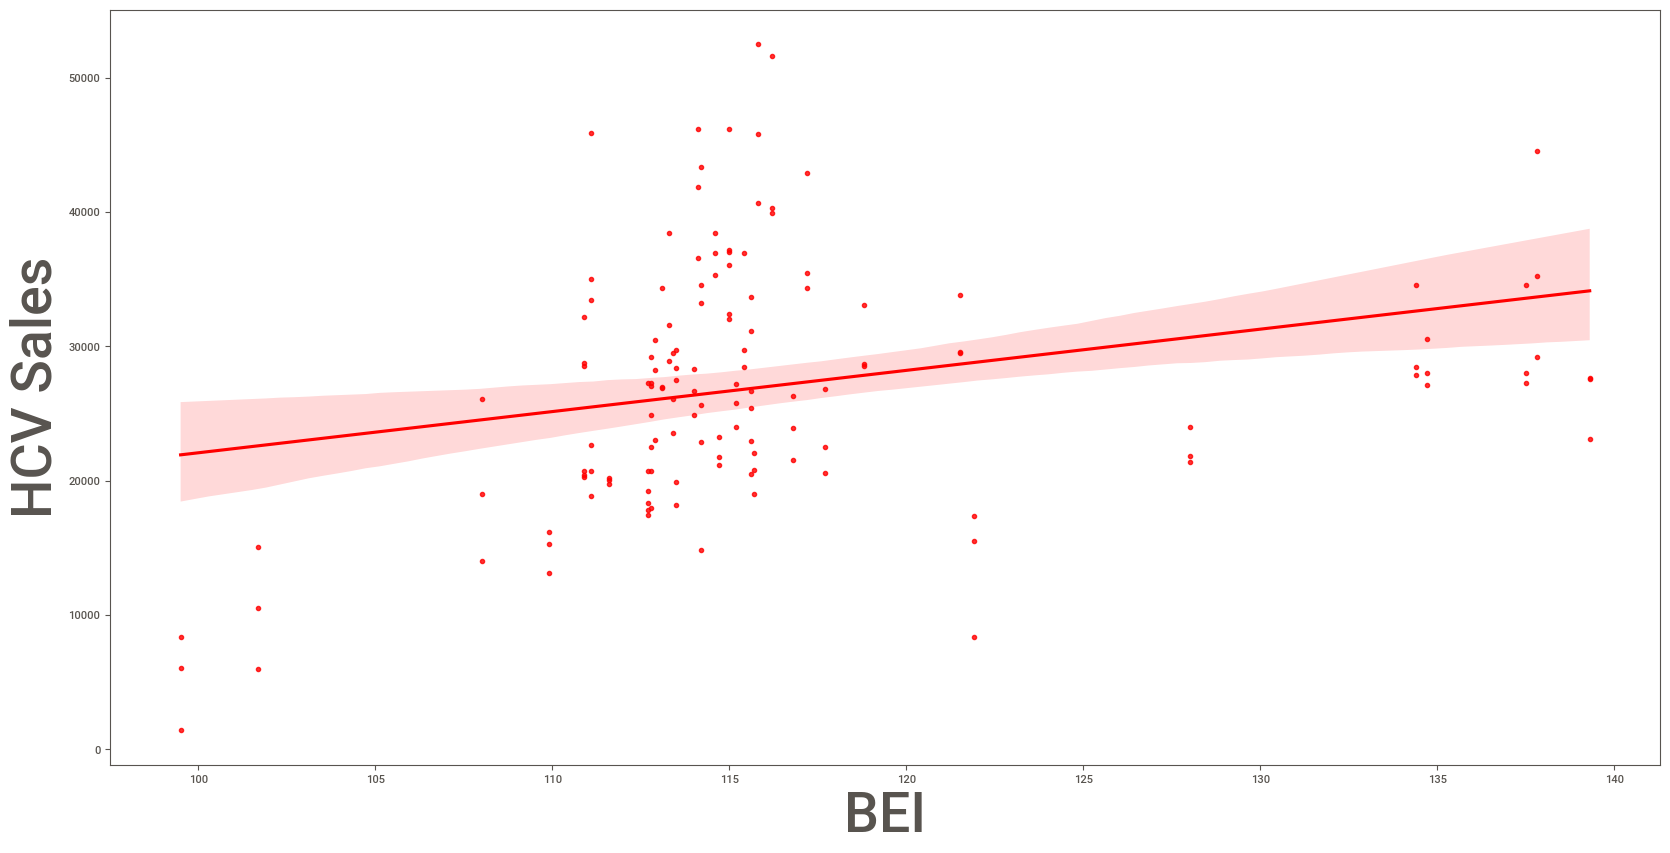

In [53]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="BEI", y = "HCV Sales", data = Hcv_after, color= 'red')

In [54]:
# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_predict = regression_model.predict(X_test)
predict = regression_model.predict(X_train)
# Show the first 12 predictions
train_mape = ((abs((y_train-predict)/y_train)).mean())*100
test_mape = ((abs((y_test-y_predict)/y_test)).mean())*100
print("Train Mape in % is ...", train_mape)
print("Test Mape in % is ...", test_mape)

Train Mape in % is ... HCV Sales    14.588268
dtype: float64
Test Mape in % is ... HCV Sales    37.555527
dtype: float64


In [56]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -1.051e+05
----------------------------------------------------------------------------------------------------
The Coefficient for FoodAGRO is 4.3e+02
The Coefficient for Food products is 1.9e+02
The Coefficient for Consumer goods is 2e+02
The Coefficient for Cosmetics, toiletries, soaps & detergents is 1.8
The Coefficient for Electronics is 2.3e+02
The Coefficient for Wholesale & retail trading (mil) is 1.1e+04
The Coefficient for Wholesale trading (mil) is 5.2e+03
The Coefficient for Retail trading(mil) is -7.4e+02
The Coefficient for M1 is 0.0012
The Coefficient for M3 is -1.2e+02


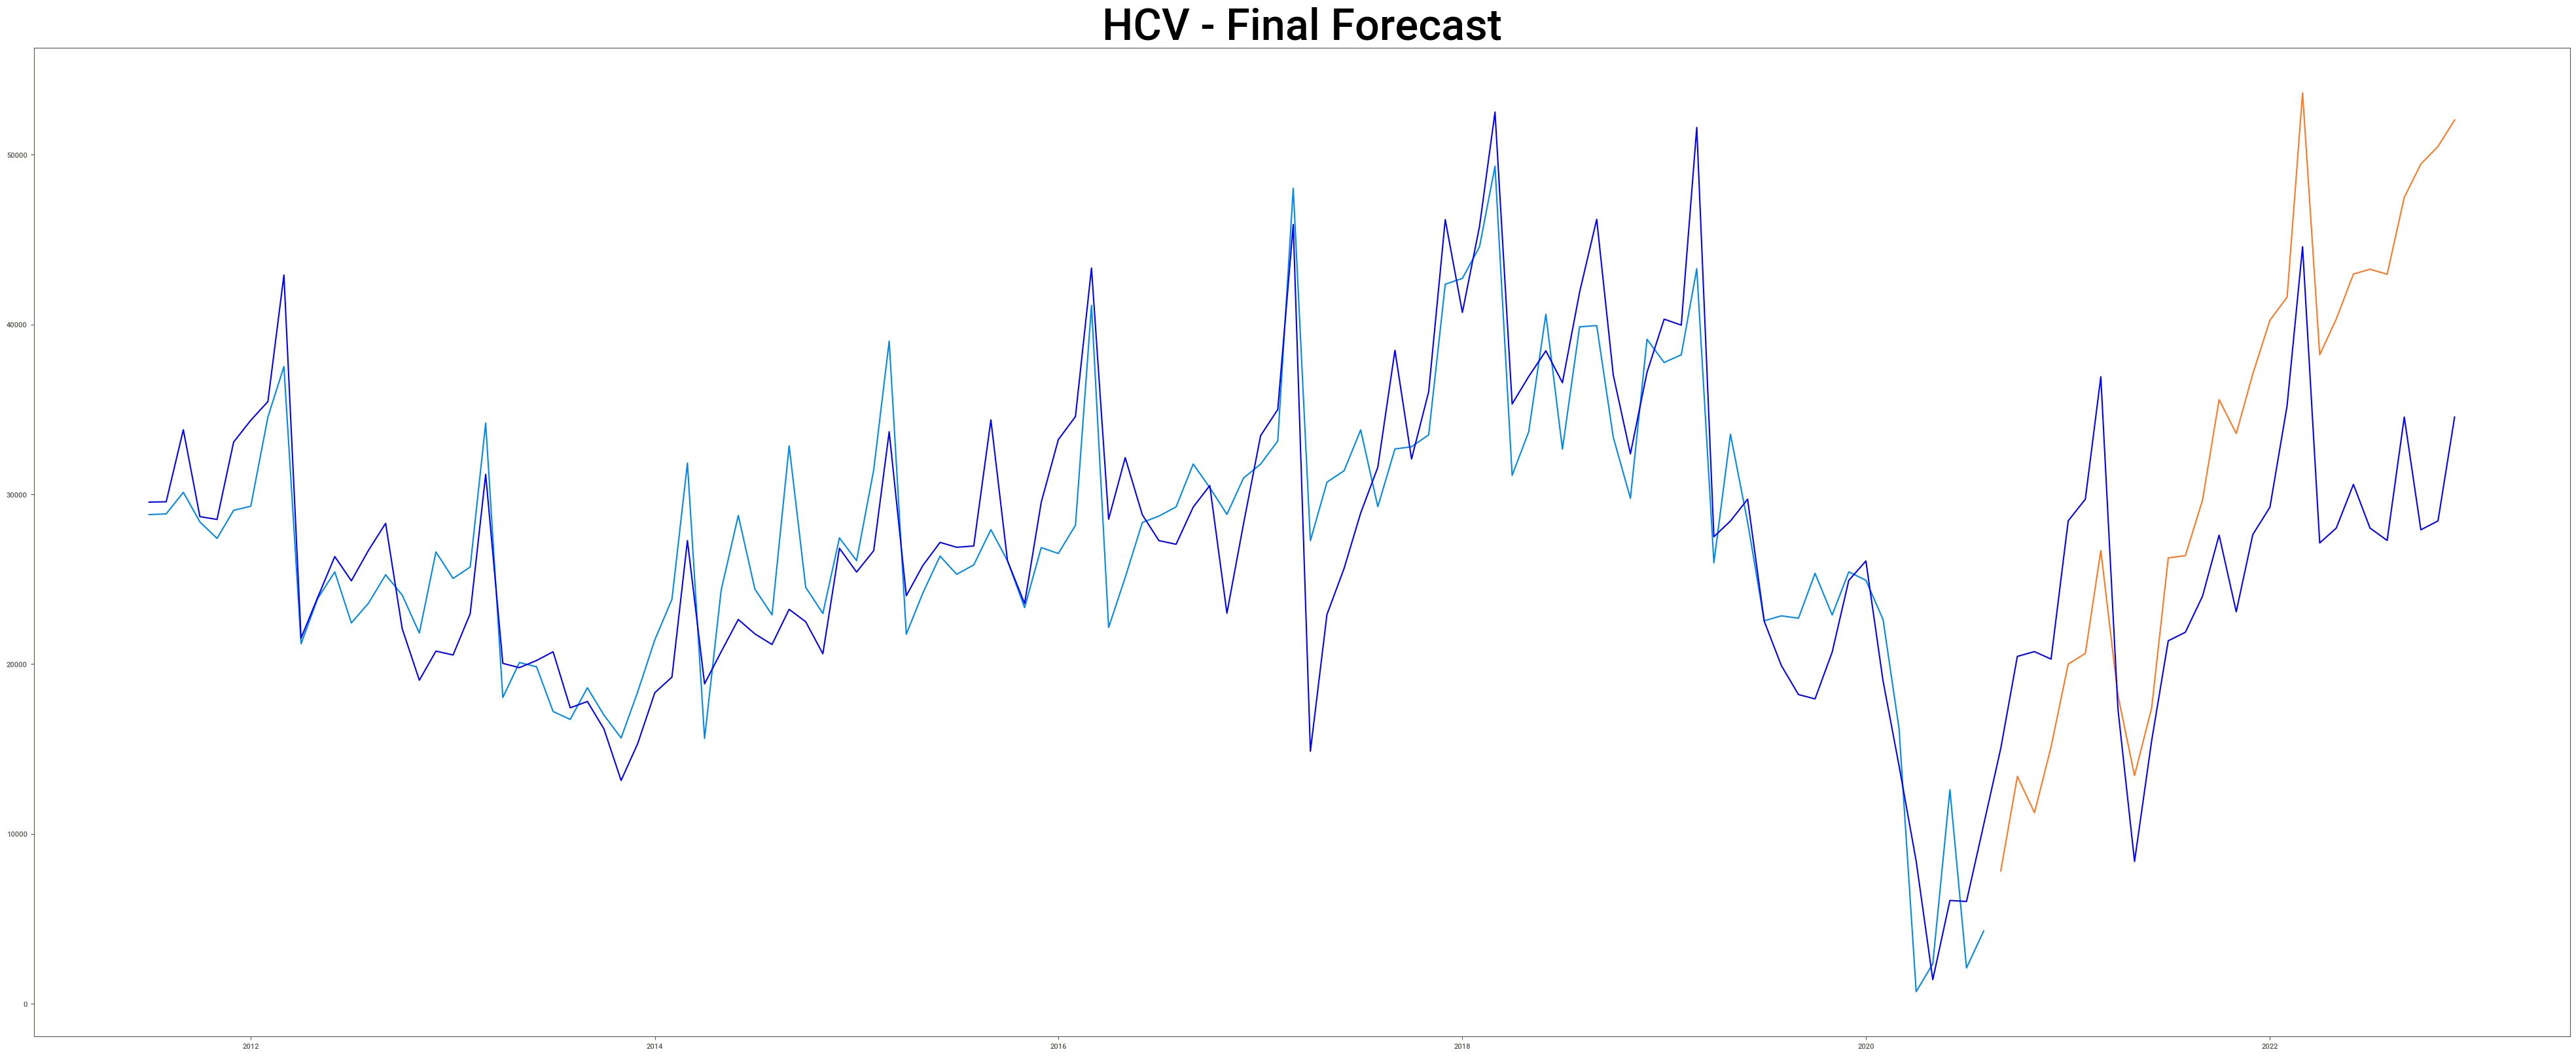

In [57]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.plot(X_train.index,predict)
plt.plot(X_test.index,y_predict)
plt.plot(X.index,y,color = 'blue')
plt.title("HCV - Final Forecast")
plt.show()

In [58]:
from sklearn.preprocessing import MinMaxScaler
X4 = X3
scaler = MinMaxScaler()
print(scaler.fit(X4))
MinMaxScaler()
print(scaler.data_max_)
X5 = scaler.transform(X4)

MinMaxScaler()
[1.39300000e+02 1.34700000e+02 1.16200000e+02 1.41900000e+03
 1.09317315e+02 1.46058551e+00 1.00000000e+00 2.00000000e+00
 2.33904881e+07 1.07866667e+01]


In [59]:
from sklearn.preprocessing import MinMaxScaler
Y4 = Y3
scaler = MinMaxScaler()
print(scaler.fit(Y4))
MinMaxScaler()
print(scaler.data_max_)
Y5 = scaler.transform(Y4)

MinMaxScaler()
[52517.]


In [60]:
# Split X and y into X_
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X5_train, y5_train)

LinearRegression()

In [61]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X3.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.358
----------------------------------------------------------------------------------------------------
The Coefficient for BEI is 0.12
The Coefficient for IIP is 0.57
The Coefficient for CC is 0.2
The Coefficient for Retail Sales is 0.11
The Coefficient for Ind_freight is 0.14
The Coefficient for Season_Index is 0.17
The Coefficient for Evnt_Pos  is 0.11
The Coefficient for Evnt_Negative is -0.097
The Coefficient for COSPI is 0.15
The Coefficient for Growth YoY% is 0.034
